In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("IMDB.csv")

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
X = data["review"]
y = data["sentiment"]

# 1. Remove Non Alphabetic Characters

In [5]:
X.shape, y.shape

((50000,), (50000,))

In [6]:
X[0][:250]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of "

**We will remove non alphabetic characters, best way to do that is [regex](https://docs.python.org/3/library/re.html) method**

In [7]:
import re
for i in range(X.shape[0]):
    X[i] = re.sub('[^A-Za-z]', ' ', X[i])

In [8]:
X[0][:250]

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of '

# 2.Stemming

In [9]:
for i in range(X.shape[0]):
    X[i] = X[i].split(" ")
    X[i] = [w for w in X[i] if w != ""]

In [10]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [12]:
for i in range(X.shape[0]):
    X[i] = [stemmer.stem(w) for w in X[i]]

KeyboardInterrupt: 

In [13]:
" ".join(X[0][:40])

'one of the other review ha mention that after watch just oz episod you ll be hook they are right as thi is exactli what happen with me br br the first thing that struck me about oz wa it'

**Make every word lower case**

In [14]:
for i in range(X.shape[0]):
    X[i] = [w.lower() for w in X[i]]

KeyboardInterrupt: 

In [15]:
" ".join(X[0][:40])

'one of the other review ha mention that after watch just oz episod you ll be hook they are right as thi is exactli what happen with me br br the first thing that struck me about oz wa it'

## 3.Remove Stop Words

In [16]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_ = stopwords.words("english")
",".join(stopwords_)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

**By removing stop words we remove the low-level information from our text in order to give more focus to the important information. This words does not effect sentiment of the review.**

In [17]:
for i in range(X.shape[0]):
    X[i] = [w for w in X[i] if w not in stopwords_]

KeyboardInterrupt: 

In [18]:
" ".join(X[0][:40])

'one review ha mention watch oz episod hook right thi exactli happen br br first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex'

## 4.Create Bag of Words for every review

**Sort words by frequency**

In [19]:
word_dict = {}
for i in range(X.shape[0]):
    for w in X[i]:
        if w not in word_dict:
            word_dict[w] = 0
        word_dict[w] += 1
word_dict = sorted(word_dict.items(), key= lambda x : x[1], reverse=True)

# print most used 20 words

cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 21:
        break
    print(k,v)

the 626871
and 308639
a 307237
of 276505
to 256123
br 201953
is 201861
it 191282
in 177151
i 145994
that 137620
thi 131052
s 124155
film 93613
movi 89910
as 86926
with 83254
for 83090
wa 83043
but 78068


**Print Word Cloud**

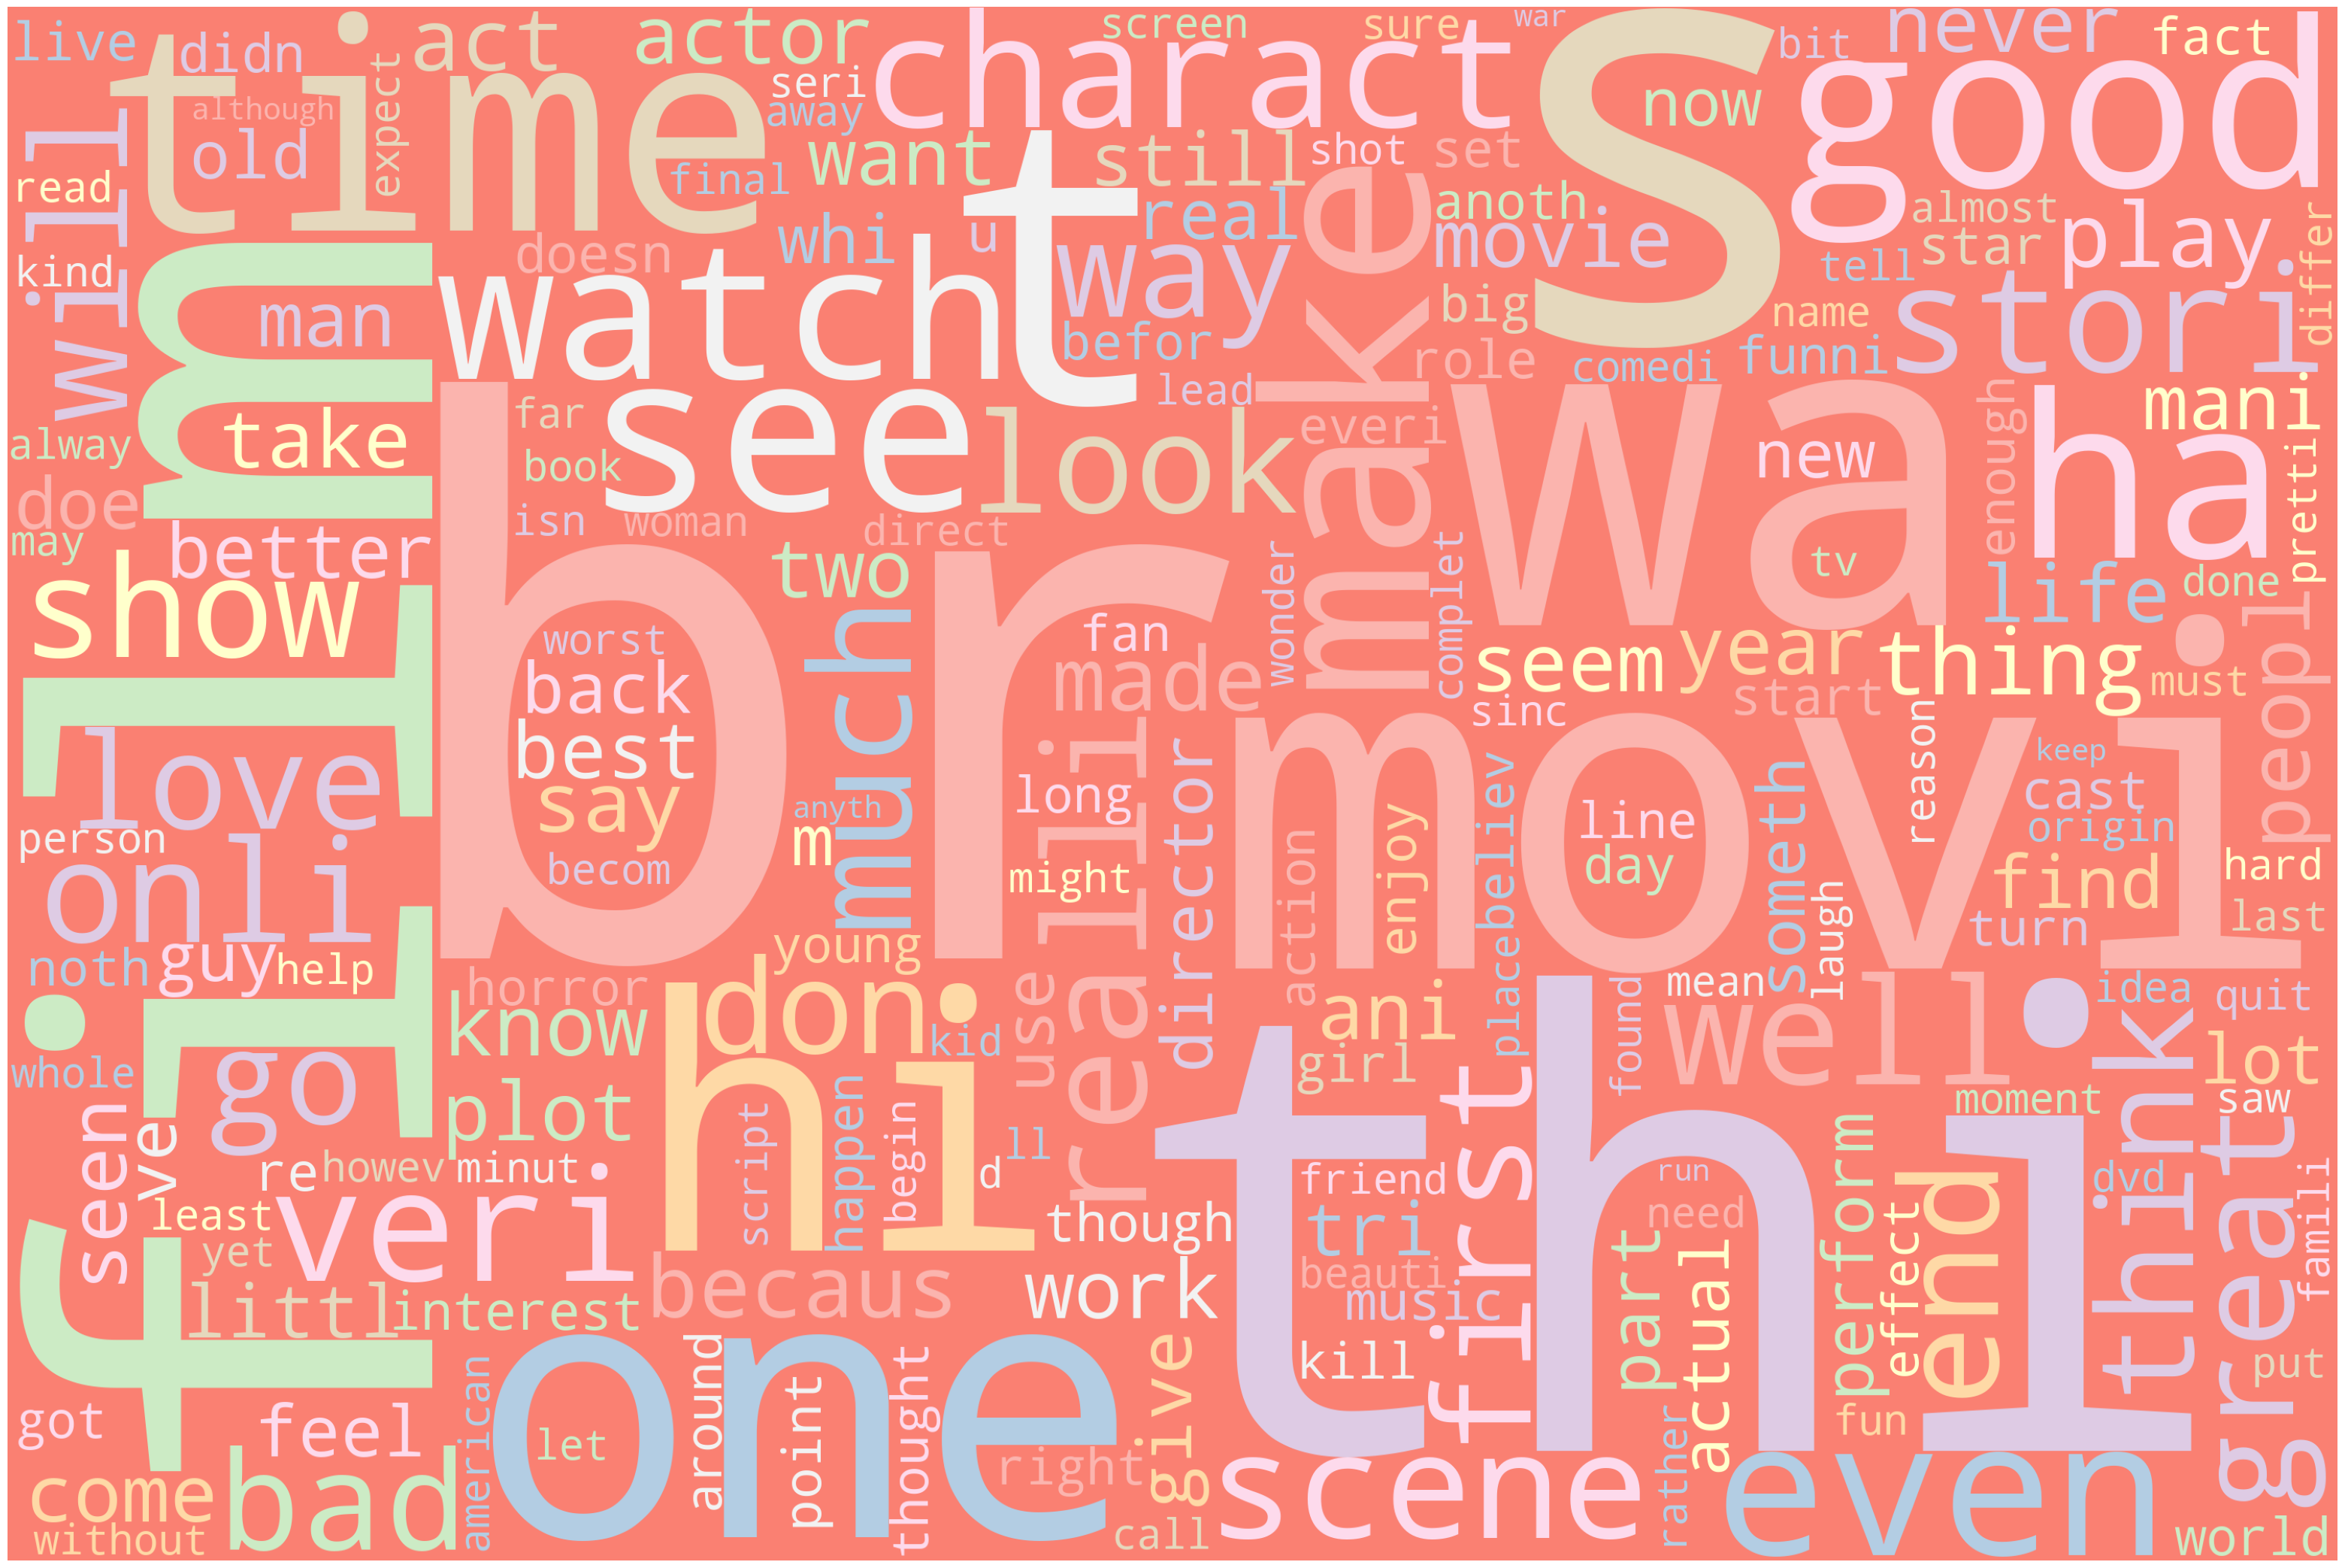

In [22]:
text = ""
cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 5000:
        break
    for i in range(v):
        text += k + " "

import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

**We will get 5000 most used words and store another dictionary**

In [23]:
most_used_words = {}
cnt = 0
index = 0
for word, freq in word_dict:
    most_used_words[word] = index
    index += 1
    cnt += 1
    if cnt == 5000:
        break
list(most_used_words.items())[0:10]

[('the', 0),
 ('and', 1),
 ('a', 2),
 ('of', 3),
 ('to', 4),
 ('br', 5),
 ('is', 6),
 ('it', 7),
 ('in', 8),
 ('i', 9)]

**We will remove words not in most used word dict and we change every word with its index**

In [24]:
X_train = []
for i in range(X.shape[0]):
    list_ = []
    for w in X[i]:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    X_train.append(list_)
for i in X_train[0]:
    print(i, end=" ")

28 359 50 484 57 2930 321 1813 207 11 727 218 5 5 91 106 2931 2930 18 1243 75 684 185 207 405 93 1530 11 81 447 11 81 725 1850 1254 729 409 684 3650 336 159 405 5 5 276 2930 397 2127 650 1183 1566 580 3491 2043 905 2013 1986 960 315 326 3924 2663 580 371 133 3851 1249 1103 2430 334 2350 535 119 245 265 5 5 62 112 302 928 81 708 196 340 81 1705 786 231 424 1219 2318 305 786 761 786 935 2930 826 200 91 321 131 229 2931 1616 18 1888 112 18 1693 57 500 1147 2930 206 326 559 1335 684 684 3235 1906 2727 211 574 55 265 70 1105 781 661 204 905 4223 708 414 728 1174 905 493 57 2930 215 269 2018 3047 345 55 578 3606 472 

## 5.Train with RNN

**Get average length of lists**

In [25]:
leng = 0
for i in range(len(X_train)):
    leng += len(X_train[i])
leng / len(X_train)

215.40234

In [26]:
X_train = np.array(X_train)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (50000,) + inhomogeneous part.

**Average length of sentences 119, we can use 125. We will constrain size of every sentence to 125. Algorithm will complete smaller sentences to 125 by adding zeros.**

In [27]:
import tensorflow as tf
from tensorflow import keras
X_train = keras.preprocessing.sequence.pad_sequences(X_train, 125)

In [28]:
print(X_train.shape)
for i in X_train[0]:
    print(i, end=" ")

(50000, 125)
11 81 447 11 81 725 1850 1254 729 409 684 3650 336 159 405 5 5 276 2930 397 2127 650 1183 1566 580 3491 2043 905 2013 1986 960 315 326 3924 2663 580 371 133 3851 1249 1103 2430 334 2350 535 119 245 265 5 5 62 112 302 928 81 708 196 340 81 1705 786 231 424 1219 2318 305 786 761 786 935 2930 826 200 91 321 131 229 2931 1616 18 1888 112 18 1693 57 500 1147 2930 206 326 559 1335 684 684 3235 1906 2727 211 574 55 265 70 1105 781 661 204 905 4223 708 414 728 1174 905 493 57 2930 215 269 2018 3047 345 55 578 3606 472 

**We will use embedding algorithm in our RNN deep learning model. Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed**

**We will prepare our labels for deep learning algorithm**

In [27]:
y[0:5]

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [28]:
y = [1 if i=="positive" else 0 for i in y]
y[0:5]

[1, 1, 1, 0, 1]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, np.array(y), test_size = 0.2)

In [30]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.Embedding(5000, 32, input_length=125))
lstm_model.add(keras.layers.LSTM(100, return_sequences = True))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.LSTM(100, return_sequences = False))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.Dense(1, activation="sigmoid"))
lstm_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

In [31]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.00001
)
early_stopping = keras.callbacks.EarlyStopping(patience=5, verbose=1)
mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min', verbose = 1)

In [32]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 0.4155 - accuracy: 0.8004
Epoch 1: val_loss improved from inf to 0.29028, saving model to .mdl_wts.hdf5
1250/1250 [==============================] - 205s 161ms/step - loss: 0.4155 - accuracy: 0.8004 - val_loss: 0.2903 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2875 - accuracy: 0.8870
Epoch 2: val_loss did not improve from 0.29028
1250/1250 [==============================] - 189s 151ms/step - loss: 0.2875 - accuracy: 0.8870 - val_loss: 0.2983 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2644 - accuracy: 0.8970
Epoch 3: val_loss improved from 0.29028 to 0.28471, saving model to .mdl_wts.hdf5
1250/1250 [==============================] - 187s 150ms/step - loss: 0.2644 - accuracy: 0.8970 - val_loss: 0.2847 - val_accuracy: 0.8792 - lr: 0.0010
Epoch 4/10
1250/1250 [===========================

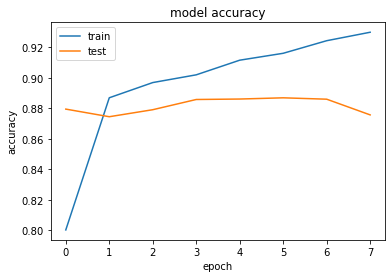

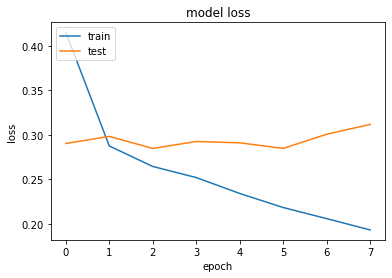

In [33]:
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

In [34]:
lstm_model.load_weights('.mdl_wts.hdf5')

In [35]:
gru_model = keras.Sequential()
gru_model.add(keras.layers.Embedding(5000, 32, input_length=125))
gru_model.add(keras.layers.GRU(100, return_sequences = True, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.GRU(100, return_sequences = False, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.Dense(1, activation="sigmoid"))
gru_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

Epoch 1/10
1250/1250 [==============================] - ETA: 0s - loss: 0.3825 - accuracy: 0.8295
Epoch 1: val_loss did not improve from 0.28471
1250/1250 [==============================] - 295s 231ms/step - loss: 0.3825 - accuracy: 0.8295 - val_loss: 0.2906 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2696 - accuracy: 0.8914
Epoch 2: val_loss did not improve from 0.28471
1250/1250 [==============================] - 294s 235ms/step - loss: 0.2696 - accuracy: 0.8914 - val_loss: 0.3074 - val_accuracy: 0.8704 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2364 - accuracy: 0.9075
Epoch 3: val_loss improved from 0.28471 to 0.26977, saving model to .mdl_wts.hdf5
1250/1250 [==============================] - 2077s 2s/step - loss: 0.2364 - accuracy: 0.9075 - val_loss: 0.2698 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - ETA: 0s - loss: 0.2159 - a

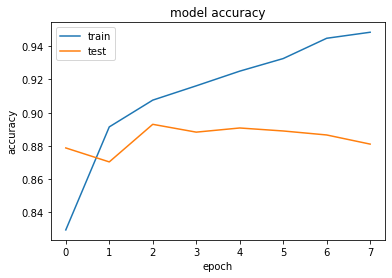

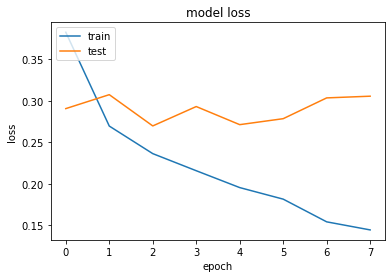

In [36]:
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

In [37]:
gru_model.load_weights('.mdl_wts.hdf5')

We will continue with GRU (Gated recurrent unit) model

In [64]:
def predict(review):
    # remove non alphabetic characters
    review = re.sub('[^A-Za-z]', ' ', review) 
    
    # stemming
    review = review.split(" ")
    review = [w for w in review if w != ""]
    review = [stemmer.stem(w) for w in review]
    
    # remove stepwords
    review = [w for w in review if w not in stopwords_]
    
    # get bag of words
    list_ = []
    for w in review:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    test = [list_]
    test = np.array(test)
    test = keras.preprocessing.sequence.pad_sequences(test, 125)
    pred = gru_model.predict(test)[0][0]
    positive= pred
    negative= 1-pred
    print(positive)
    print(negative)
    if(positive>negative):
        print('the movie is good')
    else:
        print('movie isnt good')

In [82]:
def predict1(review):
    # remove non alphabetic characters
    review = re.sub('[^A-Za-z]', ' ', review) 
    
    # stemming
    review = review.split(" ")
    review = [w for w in review if w != ""]
    review = [stemmer.stem(w) for w in review]
    
    # remove stepwords
    review = [w for w in review if w not in stopwords_]
    
    # get bag of words
    list_ = []
    for w in review:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    test = [list_]
    test = np.array(test)
    test = keras.preprocessing.sequence.pad_sequences(test, 125)
    pred = lstm_model.predict(test)[0][0]
    positive= pred
    negative= 1-pred
    print(positive)
    print(negative)
    if(positive>negative):
        print('the movie is good')
    else:
        print('movie isnt good')

In [101]:
review = "the movie was awesome , the plot was intriguring"

In [103]:
print(predict(review))
print(predict1(review))

1/1 [==============================] - 0s 67ms/step
0.65006876
0.3499312400817871
the movie is good
None
1/1 [==============================] - 0s 66ms/step
0.6493418
0.3506581783294678
the movie is good
None


In [107]:
review = "the movie plot was dragging i slept"

In [108]:
print(predict(review))
print(predict1(review))

1/1 [==============================] - 0s 74ms/step
0.052746974
0.9472530260682106
movie isnt good
None
1/1 [==============================] - 0s 75ms/step
0.244394
0.7556059956550598
movie isnt good
None


In [126]:
import pickle


In [59]:
from keras.models import load_model
gru_model.save('model.h5')
model_final = load_model('model.h5')

In [117]:
def vec(review):
    # remove non alphabetic characters
    review = re.sub('[^A-Za-z]', ' ', review) 
    
    # stemming
    review = review.split(" ")
    review = [w for w in review if w != ""]
    review = [stemmer.stem(w) for w in review]
    
    # remove stepwords
    review = [w for w in review if w not in stopwords_]
    
    # get bag of words
    list_ = []
    for w in review:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    test = [list_]
    test = np.array(test)
    test = keras.preprocessing.sequence.pad_sequences(test, 125)
    return test

In [118]:
pickle.dump(vec , open("input.pkl" , "wb"))


In [119]:
inputtxt = pickle.load(open('input.pkl','rb'))

In [127]:
##testing our serialized models
data = 'amazing movie'
vect = inputtxt(data)
my_prediction = model_final.predict(vect)
if my_prediction>0.5:
    print("nice")
else:
    print("not nice")

1/1 [==============================] - 0s 74ms/step
nice
